# Module 1

## 1.1 Reading file

In [1]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/Chto-to/"

In [2]:
df = pd.read_excel(path + "vigruzka.xlsx")
df.head()

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Краткое\nсодержание,Автор,Компания,Unnamed: 8,Unnamed: 9
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,Антонова С.В.,АО «Интерфакс»),NaN,NaN
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,Картошкин С.А.,Министерство просвещения Российской Федерации),NaN,NaN
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,Цивилев С.Е.,Администрация Кемеровской области),NaN,NaN
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,Волков Г.А.,Министерство транспорта Российской Федерации),NaN,NaN
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,Атанов И.В.,Ставропольский государственный аграрный универ...,NaN,NaN


## 1.2 Pre-processing

Drop empty

In [3]:
df = df.drop(columns = ["Unnamed: 8", "Unnamed: 9"], axis = 1)

Rename columns

In [4]:
df.columns = ["id", "doc_number", "date", "date_ish", "adresat", "description", "author", "author_company"]
df.head()

,id,doc_number,date,date_ish,adresat,description,author,author_company
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,Антонова С.В.,АО «Интерфакс»)
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,Картошкин С.А.,Министерство просвещения Российской Федерации)
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,Цивилев С.Е.,Администрация Кемеровской области)
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,Волков Г.А.,Министерство транспорта Российской Федерации)
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,Атанов И.В.,Ставропольский государственный аграрный универ...


### Drop useless

In [5]:
df = df.drop(columns = ["id", "doc_number", "date_ish"])

In [6]:
df.head()

,date,adresat,description,author,author_company
0,2019-04-09,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,Антонова С.В.,АО «Интерфакс»)
1,2019-04-09,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,Картошкин С.А.,Министерство просвещения Российской Федерации)
2,2019-04-09,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,Цивилев С.Е.,Администрация Кемеровской области)
3,2019-04-09,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,Волков Г.А.,Министерство транспорта Российской Федерации)
4,2019-04-09,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,Атанов И.В.,Ставропольский государственный аграрный универ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4965 non-null   datetime64[ns]
 1   adresat         4967 non-null   object        
 2   description     4967 non-null   object        
 3   author          4967 non-null   object        
 4   author_company  4966 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 194.1+ KB


In [8]:
df["date"] = pd.to_datetime(df["date"], format = "%Y/%m/%d")

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df = df.drop(["date"], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adresat         4967 non-null   object 
 1   description     4967 non-null   object 
 2   author          4967 non-null   object 
 3   author_company  4966 non-null   object 
 4   year            4965 non-null   float64
 5   month           4965 non-null   float64
 6   day             4965 non-null   float64
dtypes: float64(3), object(4)
memory usage: 271.8+ KB


In [9]:
df["year"] = df["year"].fillna(df["year"].median())
df["month"] = df["month"].fillna(df["month"].median())
df["day"] = df["day"].fillna(df["day"].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adresat         4967 non-null   object 
 1   description     4967 non-null   object 
 2   author          4967 non-null   object 
 3   author_company  4966 non-null   object 
 4   year            4967 non-null   float64
 5   month           4967 non-null   float64
 6   day             4967 non-null   float64
dtypes: float64(3), object(4)
memory usage: 271.8+ KB


### Feature Engineering

- del not [a-zA-Zа-яА-Я]
- del stopwords
- del namespaces (if exists)
- str.lower

In [11]:
df = df.dropna()

In [12]:
import nltk 
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def clean_data(df):
    df = df.str.lower()
    df = df.replace(r'[^а-яА-Яa-zA-Z]', ' ', regex = True)
    df = df.str.strip()
    stop_words = stopwords.words("russian")
    df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

In [14]:
df["description"] = clean_data(df["description"])
df["author_company"] = df["author_company"].replace(r'[^а-яА-Яa-zA-Z]', ' ', regex = True)
df["author_company"] = clean_data(df["author_company"])
df.head()

,adresat,description,author,author_company,year,month,day
0,Уразов Р.Н.,вх возможности использования сетевого издания ...,Антонова С.В.,ао интерфакс,2019.0,4.0,9.0
1,Уразов Р.Н.,вх участии совещании вопросу доработки фэо пре...,Картошкин С.А.,министерство просвещения российской федерации,2019.0,4.0,9.0
2,Уразов Р.Н.,вх командировании саликовой глушко д участия з...,Цивилев С.Е.,администрация кемеровской области,2019.0,4.0,9.0
3,Иванюк Л.А.,вх участии чемпионате мира профессиональному м...,Волков Г.А.,министерство транспорта российской федерации,2019.0,4.0,9.0
4,Уразов Р.Н.,вх участии церемонии открытия вузовского чемпи...,Атанов И.В.,ставропольский государственный аграрный универ...,2019.0,4.0,9.0


In [15]:
df["adresat"] = df["adresat"].str.lower()
df["author"] = df["author"].str.lower()

Save data

In [16]:
df.to_csv("finish_dataset_dom.csv", sep = "\t", encoding="utf-16", index = False)

### Creating dictionary of data

In [17]:
df_main = pd.DataFrame()
df_main["adresat"], df_main["description"] = df["adresat"], df["description"]
df_main.head()

,adresat,description
0,уразов р.н.,вх возможности использования сетевого издания ...
1,уразов р.н.,вх участии совещании вопросу доработки фэо пре...
2,уразов р.н.,вх командировании саликовой глушко д участия з...
3,иванюк л.а.,вх участии чемпионате мира профессиональному м...
4,уразов р.н.,вх участии церемонии открытия вузовского чемпи...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import csv

stop_words_b = stopwords.words("russian")
cvzer = CountVectorizer(stop_words=stop_words_b)
cvzer.fit(df_main["description"])
vect_dict = cvzer.fit_transform(df_main["description"]).toarray()
my_dict = cvzer.vocabulary_

In [19]:
with open("dictwordfiles.csv", "w", encoding="utf-16") as file:
    w = csv.DictWriter(file, my_dict.keys())
    w.writeheader()
    w.writerow(my_dict)

In [20]:
df_dict = pd.read_csv("dictwordfiles.csv", encoding = "utf-16")
df_dict

,вх,возможности,использования,сетевого,издания,информационный,ресурс,спарк,работе,союза,участии,совещании,вопросу,доработки,фэо,предоставления,субсидии,реализацию,проекта,билет,будущее,апр,командировании,саликовой,глушко,участия,заседании,оргкомитета,проведения,фнч,кемеровской,области,чемпионате,мира,профессиональному,мастерству,стандартам,ворлдскиллс,worldskills,kazan,...,корпоративном,поощрению,итограм,кавказском,откруге,ускорении,согласованию,приветственное,слово,шевченко,статус,членами,оснащению,стандларта,промышоенного,радиочастотным,возражения,исковое,завление,использовать,выставочного,московский,экзаме,кадылевой,жилищной,файзулину,съемок,класс,омской,отсрочках,май,лушие,дуального,дирекцией,рогодской,присутствии,предполагается,стратегическому,проектам,протокольного
0,649,554,1430,3976,1284,1388,3780,4184,3608,4176,4650,4060,589,1018,4784,3226,4321,3710,3444,351,392,242,1629,3868,752,4653,1208,2587,3401,4753,1566,2378,4878,2072,3529,1935,4256,593,103,59,...,1753,3095,1457,1473,2679,4605,4087,3303,4018,4923,4270,4900,2619,4261,3489,3625,565,1416,1116,1431,695,2139,4947,1484,1100,4689,4360,1585,2521,2708,1910,1900,1050,933,3805,3381,3232,4297,3445,3513


### Results of preprocessing

We do:

- Drop useless columns
- Clean data from non-literals
- Make dictionary of data

## 1.3 Visualisation

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

### Wordclouds

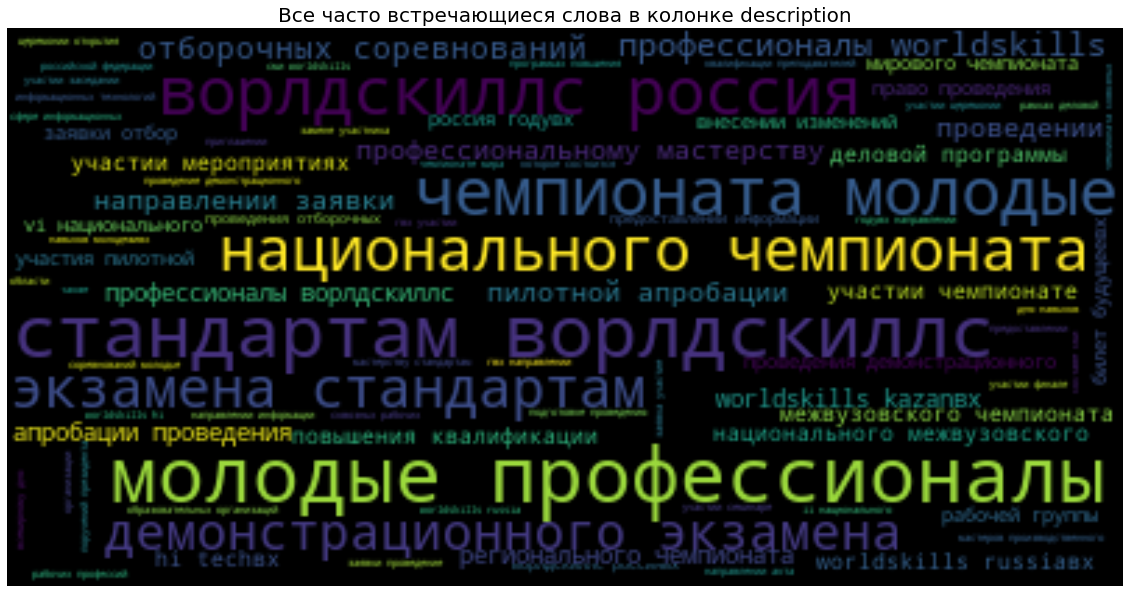

In [22]:
text = df["description"].str.cat()
plt.figure(figsize = (20, 20))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Все часто встречающиеся слова в колонке description", fontsize = 20)
plt.show()

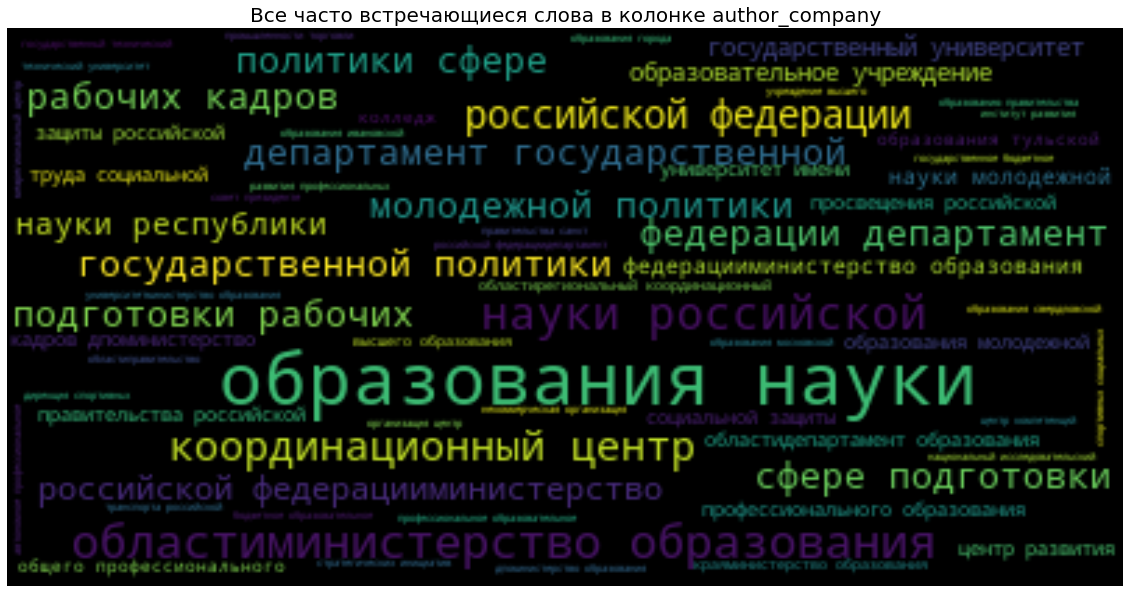

In [23]:
text = df["author_company"].str.cat()
plt.figure(figsize = (20, 20))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Все часто встречающиеся слова в колонке author_company", fontsize = 20)
plt.show()

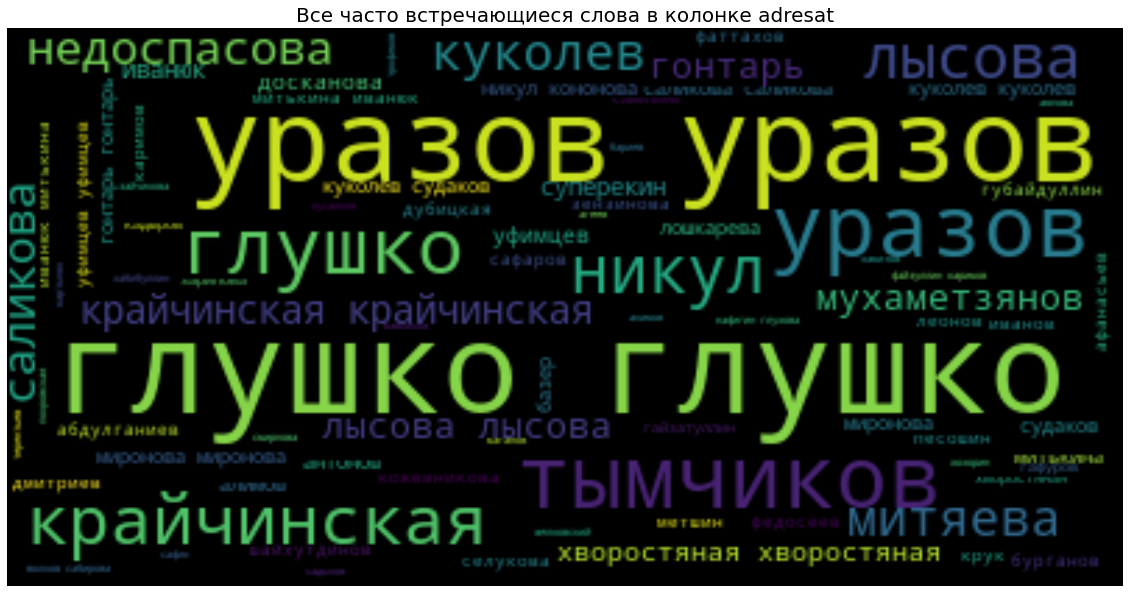

In [24]:
text = df["adresat"].str.cat()
plt.figure(figsize = (20, 20))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Все часто встречающиеся слова в колонке adresat", fontsize = 20)
plt.show()

### Classic plots

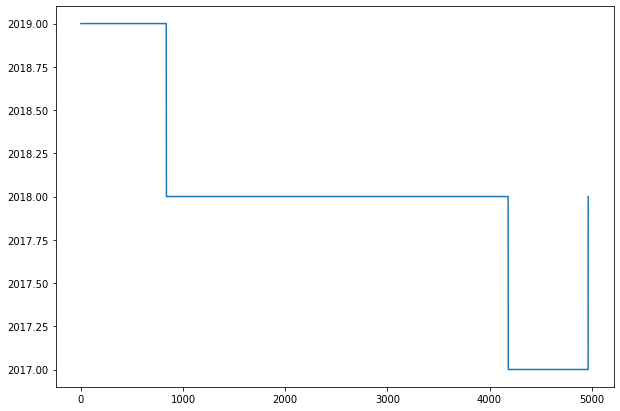

In [25]:
df["year"].plot(figsize = (10, 7))

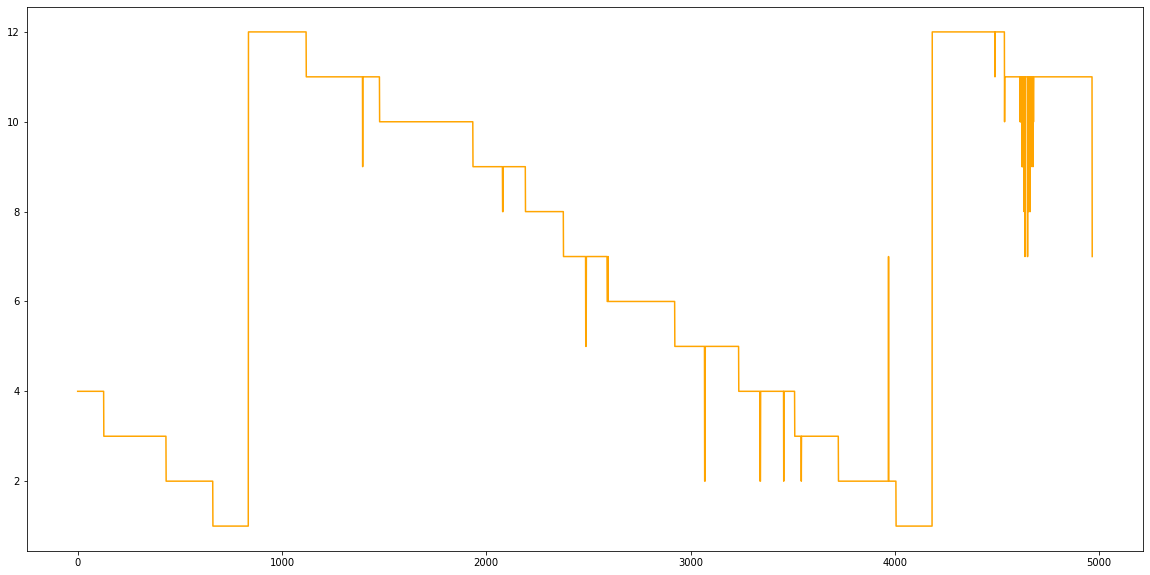

In [26]:
df['month'].plot(figsize=(20, 10), color="orange")

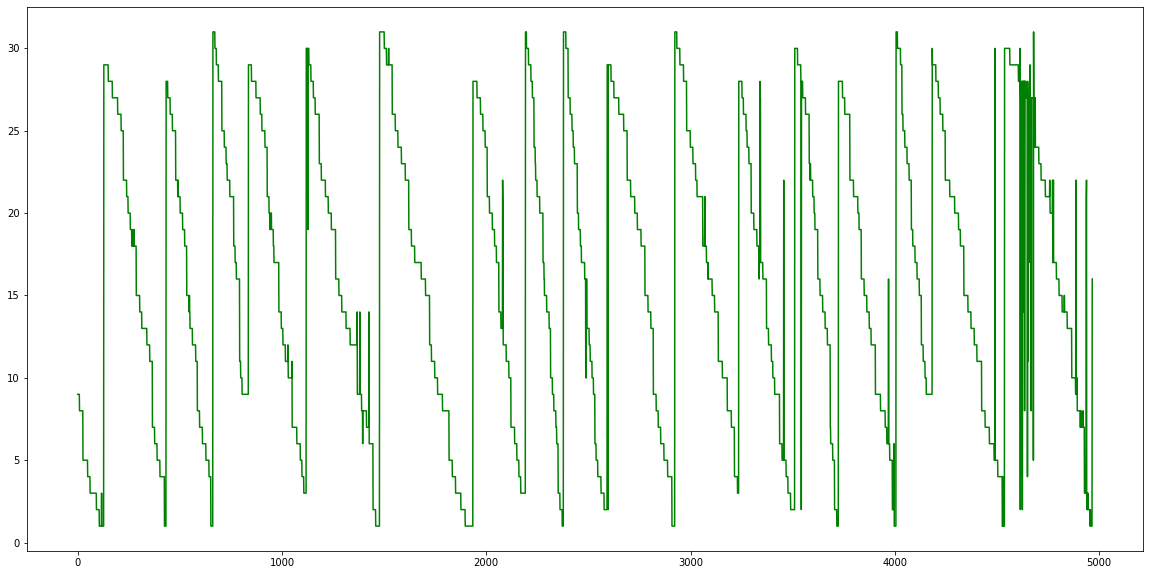

In [27]:
df['day'].plot(figsize=(20, 10), color="green")

## Results of module

We have:
- Read the file
- Pre-processed it
- Saved resulting file after all processing
- Visualize data

# Module 2

## 2.1 Choosing models and splitting data

- Decision Tree - Simple and fast model
- Naive Bayes - Great for text processing
- SVC(SupportVectorMachine) - Good linear model

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### PCA to make data smaller

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
pca_feat_x = pca.fit_transform(vect_dict)

In [30]:
x = pca_feat_x
y = df["adresat"].values

90:10 due to we don't have many enough data 

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True)

## 2.2 Training models before Feature Engineering

### Decision Tree 

In [32]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
dtc.score(x_test, y_test)

0.5251509054325956

### Naive Bayes Before

In [33]:
nbc = GaussianNB().fit(x_train, y_train)
nbc.score(x_test, y_test)

0.448692152917505

### SVC Before

In [34]:
svc = SVC().fit(x_train, y_train)
svc.score(x_test, y_test)

0.7022132796780685

### Results

- Decision Tree - 52.52%
- Naive Bayes - 44.87%
- SVC(SupportVectorMachine) - 70.22%

Best model is `SVC` with result of 70.22% prediction

## 2.3 Feature Engineering

### Make type of importance for directors

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
def class_v(x):
    if x == str("уразов р.н.") or x == str("глушко д.е."):
        return 1
    else:
        return 0

In [37]:
import numpy as np
df["class_v"] = np.nan
df["class_v"] = df["adresat"].apply(lambda x: class_v(x))

In [38]:
x = pca_feat_x
y = df["class_v"].values

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True)

## 2.4 Training models after Feature Engineering

### Decision Tree

In [40]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
dtc.score(x_test, y_test)

0.7665995975855131

In [41]:
print(classification_report(y_test, dtc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       202
           1       0.81      0.80      0.80       295

    accuracy                           0.77       497
   macro avg       0.76      0.76      0.76       497
weighted avg       0.77      0.77      0.77       497



### Naive Bayes

In [42]:
nbc = GaussianNB().fit(x_train, y_train)
nbc.score(x_test, y_test)

0.5593561368209256

In [43]:
print(classification_report(y_test, nbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.47      0.71      0.57       202
           1       0.70      0.45      0.55       295

    accuracy                           0.56       497
   macro avg       0.59      0.58      0.56       497
weighted avg       0.61      0.56      0.56       497



### SVC After

In [44]:
svc = SVC().fit(x_train, y_train)
svc.score(x_test, y_test)

0.8370221327967807

In [45]:
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       202
           1       0.83      0.92      0.87       295

    accuracy                           0.84       497
   macro avg       0.84      0.82      0.83       497
weighted avg       0.84      0.84      0.83       497



### Results


- Decision Tree - 76.66%
- Naive Bayes - 55.94%
- SVC(SupportVectorMachine) - 83.70%

Best model is `SVC` with result of 83.70% prediction

## Results of module

We have trained 3 models, made feature engineering and trained models again

So results are chaged:

- Decision Tree - from 52.52% to 76.66% (+45%)
- Naive Bayes - from 44.87% to 55.94% (+24%)
- SVC(SupportVectorMachine) - from 70.22% to 83.70% (+20%)

After Feature Engineering we gain increase rate by 20-45%

# Result

In 1st module we read data, preprocess it and visualize it

In 2nd module we trained models, try to improve result, and gain increase of prediction rate